In [ ]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


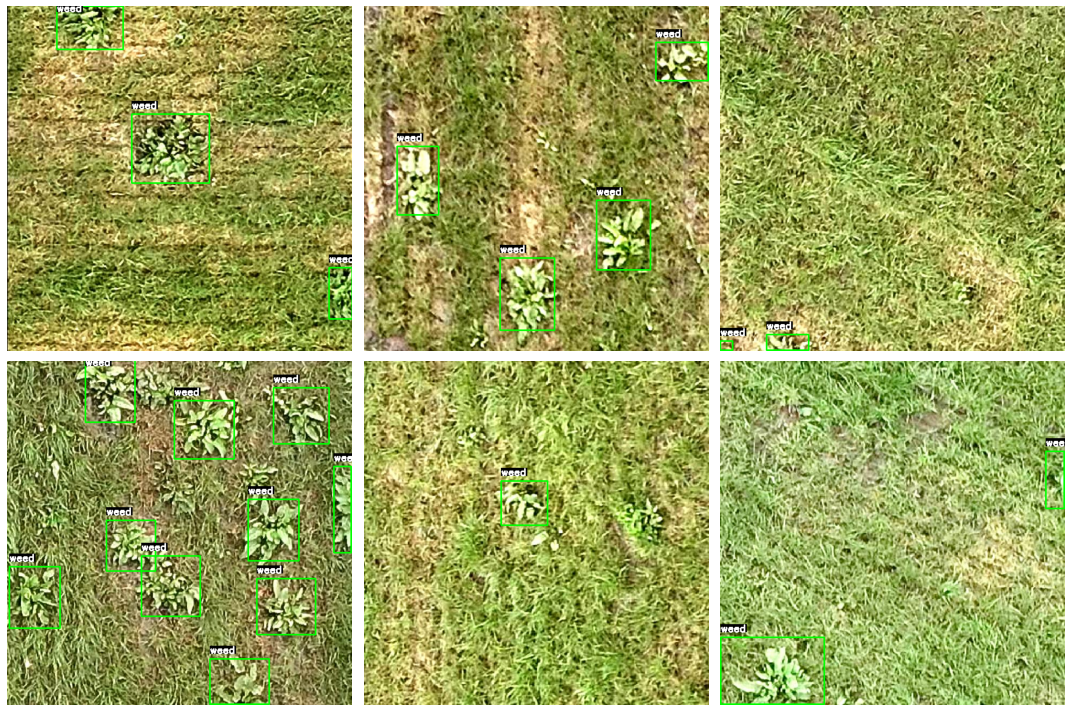

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "/home/user/CourseWork/datasets/Weed_Grass/train/images"
labels_folder = "/home/user/CourseWork/datasets/Weed_Grass/train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (text_x, text_y - text_size[1]), (text_x + text_size[0], text_y), (0, 0, 0), -1)
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolo11m.pt")

100%|██████████| 38.8M/38.8M [00:01<00:00, 23.1MB/s]


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml ', epochs=50, imgsz=640,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO11m', name='Medium_try',
            batch=32, device=device, seed=69)

New https://pypi.org/project/ultralytics/8.3.64 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=data.yaml , epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO11m, name=Medium_try, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning /home/user/CourseWork/datasets/Weed_Grass/train/labels.cache... 3036 images, 8 backgrounds, 0 corrupt: 100%|██████████| 3036/3036 [00:00<?, ?it/s]
val: Scanning /home/user/CourseWork/datasets/Weed_Grass/valid/labels.cache... 526 images, 1 backgrounds, 0 corrupt: 100%|██████████| 526/526 [00:00<?, ?it/s]


Plotting labels to YOLO11m/Medium_try/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to YOLO11m/Medium_try
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      18.1G      1.882      1.613      1.664        107        640: 100%|██████████| 95/95 [00:34<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.80it/s]

                   all        526       1598      0.607      0.635      0.613      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      17.5G      1.832      1.287      1.603        119        640: 100%|██████████| 95/95 [00:32<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.95it/s]


                   all        526       1598      0.748      0.635      0.677       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      17.6G      1.792      1.259      1.574         89        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.92it/s]

                   all        526       1598      0.751      0.668      0.716      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      17.5G      1.774      1.216       1.56        110        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.84it/s]


                   all        526       1598      0.662      0.656      0.648      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      17.6G      1.782      1.233      1.572        103        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        526       1598      0.741       0.74      0.773       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      17.5G      1.742        1.2      1.553        129        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  3.00it/s]

                   all        526       1598      0.752       0.72       0.77      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      17.6G      1.735      1.202      1.547        101        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        526       1598      0.723      0.708      0.745      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      17.5G      1.719      1.185      1.532         83        640: 100%|██████████| 95/95 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        526       1598      0.731      0.738      0.772      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      17.6G      1.719      1.165      1.536         87        640: 100%|██████████| 95/95 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.96it/s]

                   all        526       1598      0.751      0.736      0.785      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      17.6G      1.694      1.138      1.519         87        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        526       1598      0.749      0.734      0.773      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      17.6G      1.662      1.157      1.503        105        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        526       1598       0.77      0.758      0.796      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      17.5G      1.663      1.138      1.505        116        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        526       1598      0.774      0.742      0.797      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      17.6G      1.669      1.141      1.503         89        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.95it/s]


                   all        526       1598      0.797      0.684      0.723       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      17.5G      1.648      1.112      1.489        100        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]

                   all        526       1598      0.764      0.743      0.794      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      17.6G      1.644      1.096      1.488        106        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.00it/s]

                   all        526       1598       0.78      0.737      0.803      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      17.5G      1.641      1.103      1.482         77        640: 100%|██████████| 95/95 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]

                   all        526       1598      0.767      0.742      0.795      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      17.6G      1.639      1.094      1.488        104        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        526       1598      0.772      0.747        0.8      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      17.5G      1.624      1.079      1.473        100        640: 100%|██████████| 95/95 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  3.00it/s]

                   all        526       1598      0.776      0.741      0.799      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      17.6G      1.624      1.084      1.475        102        640: 100%|██████████| 95/95 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]

                   all        526       1598      0.768      0.738       0.79      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      17.5G      1.626      1.078      1.473         80        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        526       1598      0.783       0.73      0.795       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      17.6G      1.613        1.1      1.474         86        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        526       1598      0.782      0.737      0.792      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      17.5G      1.606      1.063      1.462         83        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.02it/s]

                   all        526       1598      0.782      0.744        0.8      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      17.6G      1.592      1.039      1.452        118        640: 100%|██████████| 95/95 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]

                   all        526       1598      0.775      0.741      0.801      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      17.5G      1.593      1.056      1.454        121        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        526       1598      0.763      0.737      0.794      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      17.6G      1.579      1.043      1.446        131        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.00it/s]

                   all        526       1598      0.776      0.745      0.808      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      17.5G      1.574      1.043      1.444         92        640: 100%|██████████| 95/95 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]

                   all        526       1598      0.782      0.755      0.803      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      17.6G       1.56      1.026      1.436         82        640: 100%|██████████| 95/95 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.02it/s]

                   all        526       1598       0.77      0.752      0.795      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      17.5G      1.565      1.029       1.43         96        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  3.00it/s]

                   all        526       1598      0.753      0.759      0.799      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      17.6G      1.549      1.012      1.427        114        640: 100%|██████████| 95/95 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        526       1598      0.775      0.721      0.796      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      17.5G       1.56      1.031      1.438         88        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        526       1598      0.769      0.754      0.808      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      17.6G      1.534     0.9874      1.428        122        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        526       1598      0.766      0.775      0.808      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      17.5G      1.555      1.009      1.427        133        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        526       1598      0.764      0.755        0.8      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      17.6G      1.541     0.9992       1.42        107        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        526       1598       0.78      0.756      0.807      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      17.5G      1.538      1.004      1.424         99        640: 100%|██████████| 95/95 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        526       1598      0.766      0.757      0.809      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      17.6G       1.52      0.994      1.413        117        640: 100%|██████████| 95/95 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        526       1598      0.756      0.758      0.804      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      17.5G      1.517      0.983      1.411         99        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        526       1598      0.768      0.767      0.807      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      17.6G      1.531      0.991      1.413        101        640: 100%|██████████| 95/95 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        526       1598      0.779      0.746        0.8       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      17.5G      1.502     0.9726      1.397         87        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        526       1598      0.769       0.75      0.803      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      17.6G      1.485     0.9687      1.397        112        640: 100%|██████████| 95/95 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        526       1598      0.758      0.756      0.799      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      17.6G        1.5     0.9479      1.403         86        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        526       1598      0.768      0.747      0.804      0.425


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      17.6G      1.504     0.9118      1.471         68        640: 100%|██████████| 95/95 [00:32<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.03it/s]

                   all        526       1598      0.799      0.732      0.802      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      17.5G       1.49     0.8973      1.466         48        640: 100%|██████████| 95/95 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.02it/s]

                   all        526       1598      0.783      0.754      0.806      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      17.6G      1.467     0.8854      1.443         58        640: 100%|██████████| 95/95 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.02it/s]

                   all        526       1598      0.759      0.749      0.797      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      17.5G      1.463     0.8703      1.442         62        640: 100%|██████████| 95/95 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.03it/s]

                   all        526       1598      0.766      0.758      0.798      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      17.6G      1.454     0.8573       1.43         53        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  3.00it/s]

                   all        526       1598      0.779      0.748        0.8      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      17.5G      1.442     0.8664      1.429         61        640: 100%|██████████| 95/95 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        526       1598      0.772      0.745      0.797      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      17.5G      1.434     0.8542      1.428         75        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.00it/s]

                   all        526       1598      0.764      0.763      0.807      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      17.5G      1.436     0.8389      1.425         68        640: 100%|██████████| 95/95 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        526       1598      0.756      0.762      0.801      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      17.5G      1.423     0.8412      1.415         64        640: 100%|██████████| 95/95 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        526       1598       0.76       0.76      0.796      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      17.5G      1.418     0.8445       1.42         55        640: 100%|██████████| 95/95 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        526       1598       0.77      0.747        0.8      0.424



50 epochs completed in 0.504 hours.
Optimizer stripped from YOLO11m/Medium_try/weights/last.pt, 40.5MB
Optimizer stripped from YOLO11m/Medium_try/weights/best.pt, 40.5MB

Validating YOLO11m/Medium_try/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]


                   all        526       1598      0.766      0.757      0.809      0.435
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to YOLO11m/Medium_try


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9e685631f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
df = pd.read_csv('YOLO11m/Medium_try/results.csv')

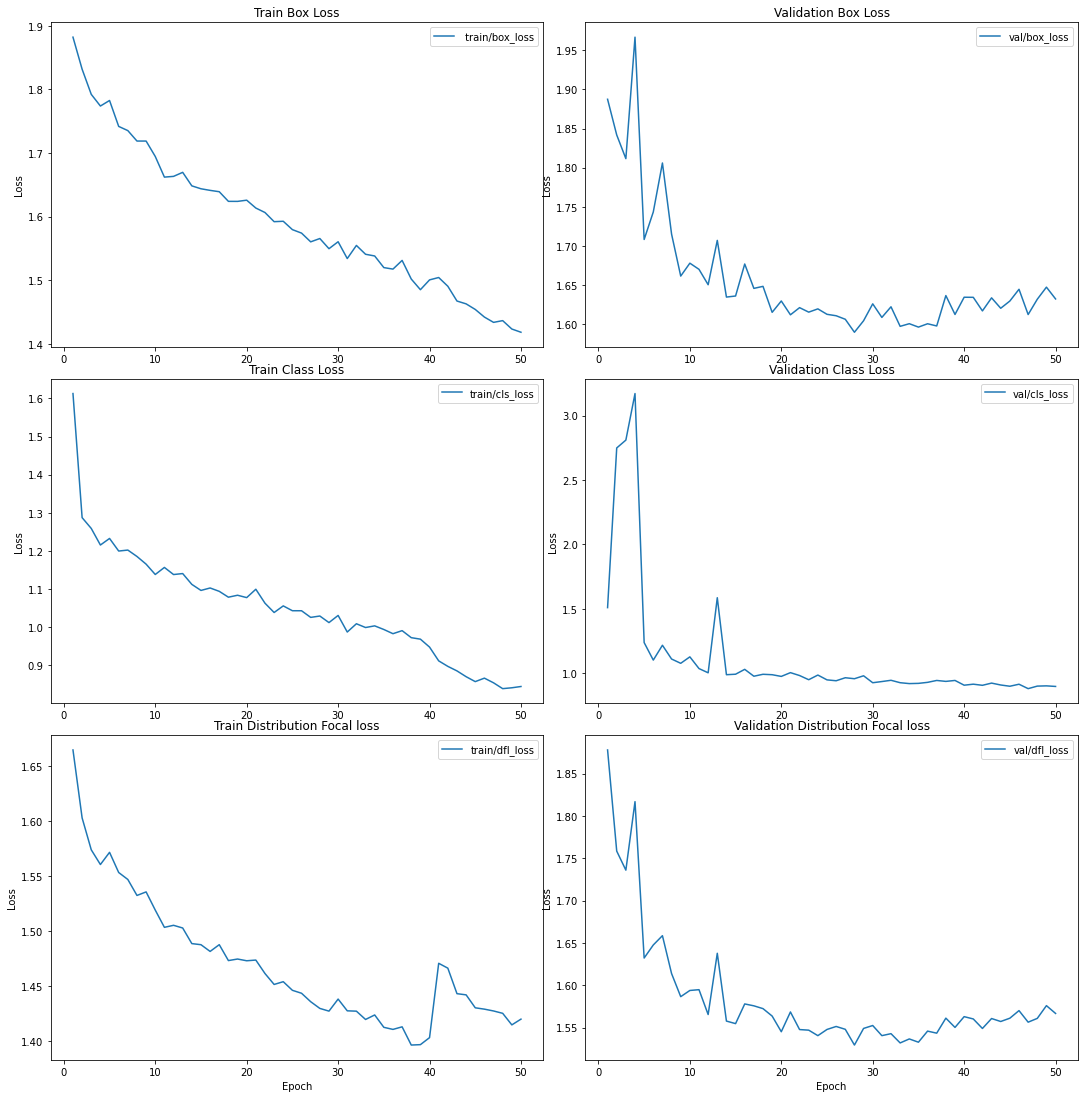

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

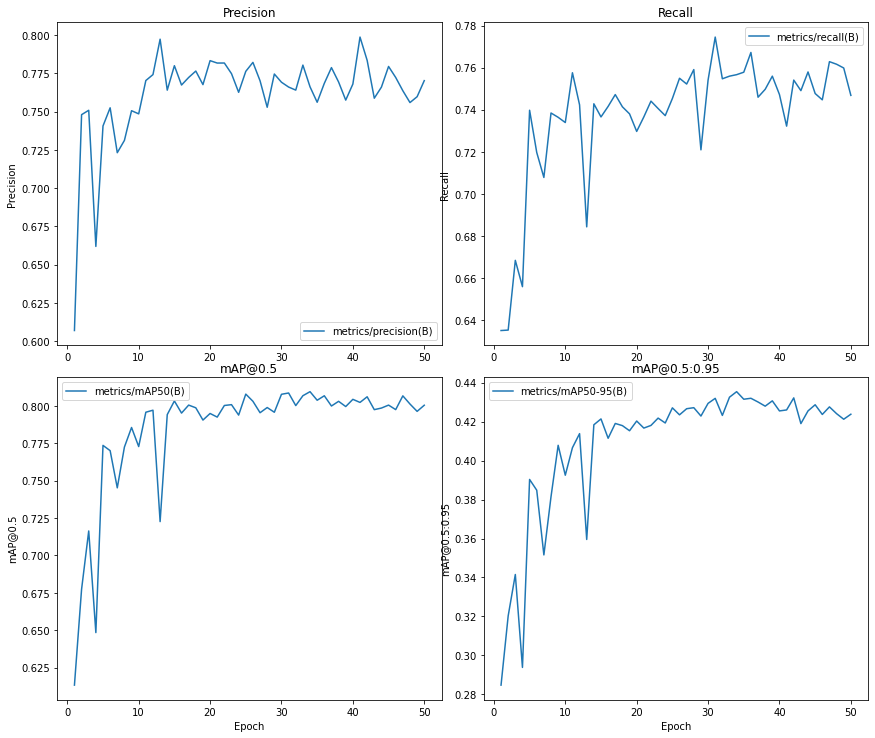

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

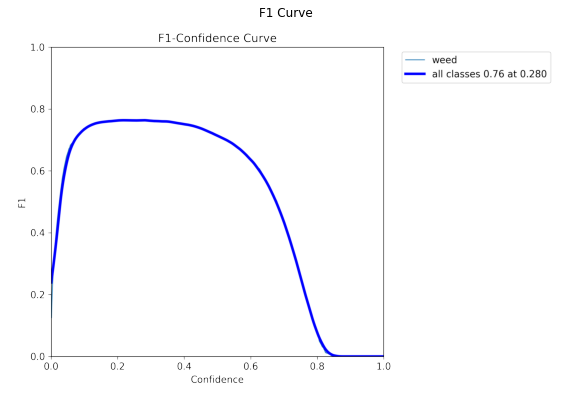

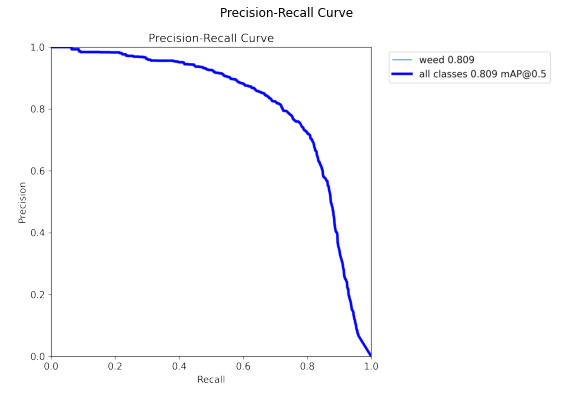

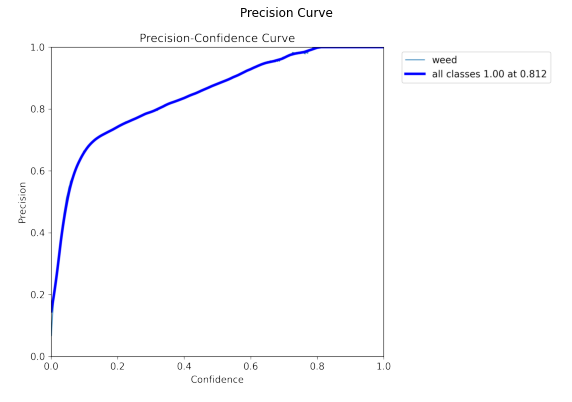

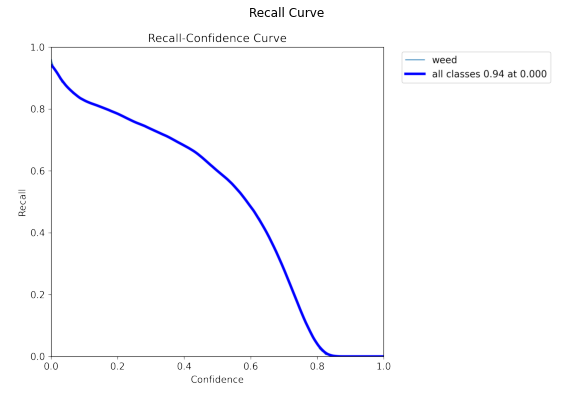

In [9]:
# F1_curve.png
f1_curve = Image.open("YOLO11m/Medium_try/F1_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(f1_curve)
plt.title("F1 Curve")
plt.axis("off")
plt.show()

# PR_curve.png
pr_curve = Image.open("YOLO11m/Medium_try/PR_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(pr_curve)
plt.title("Precision-Recall Curve")
plt.axis("off")
plt.show()

# P_curve.png
p_curve = Image.open("YOLO11m/Medium_try/P_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(p_curve)
plt.title("Precision Curve")
plt.axis("off")
plt.show()

# R_curve.png
r_curve = Image.open("YOLO11m/Medium_try/R_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(r_curve)
plt.title("Recall Curve")
plt.axis("off")
plt.show()

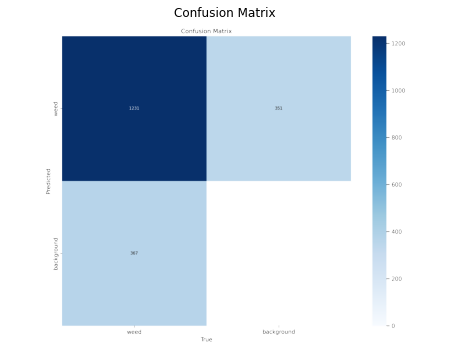

In [10]:
confusion_matrix = Image.open("YOLO11m/Medium_try/confusion_matrix.png")
plt.figure(figsize=(12, 6))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/datasets/Weed_Grass/test/images/ridderzuring_7129_jpg.rf.16d2d54b093fbbb969a8ea5d347e2fa5.jpg: 640x640 4 weeds, 12.2ms
Speed: 1.1ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


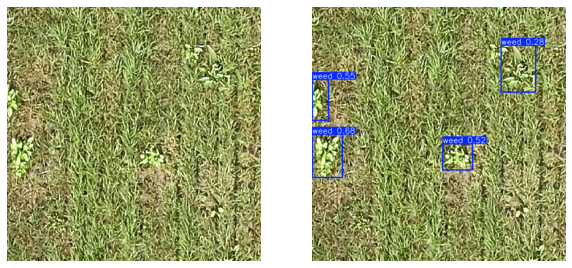

In [11]:
res = model('/home/user/CourseWork/datasets/Weed_Grass/test/images/ridderzuring_7129_jpg.rf.16d2d54b093fbbb969a8ea5d347e2fa5.jpg')
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Отображение первого изображения
axes[0].imshow(plt.imread('/home/user/CourseWork/datasets/Weed_Grass/test/images/ridderzuring_7129_jpg.rf.16d2d54b093fbbb969a8ea5d347e2fa5.jpg'))
axes[0].axis('off')

# Отображение результатов модели
axes[1].imshow(detect_img)
axes[1].axis('off')

plt.show();